# Project Title: Cardiovascular Disease Prediction

### Project Introduction
Cardiovascular disease (CVD) remains one of the leading causes of morbidity and mortality worldwide, making early detection and prevention critical in healthcare. With the increasing availability of health data, machine learning techniques have emerged as powerful tools for predicting health risks, including the likelihood of developing cardiovascular diseases. This project leverages a logistic regression model to predict the 10-year risk of coronary heart disease (CHD) in patients based on various demographic and clinical factors. By harnessing the power of predictive analytics, this project aims to enhance early diagnosis, inform treatment strategies, and ultimately contribute to improved patient outcomes.

### Project Description
The Cardiovascular Disease Prediction project focuses on developing a predictive model to assess the risk of coronary heart disease using a dataset that includes demographic factors, medical history, and behavioural attributes of patients. The project involves the following key steps:

- **Data Collection:** A comprehensive dataset was gathered, comprising relevant features associated with cardiovascular health. This dataset was subjected to exploratory data analysis to identify trends, patterns, and potential anomalies.

- **Data Preprocessing:** To address the challenges of class imbalance inherent in the dataset, the SMOTE (Synthetic Minority Over-sampling Technique) technique was employed. This ensured a balanced representation of patients with and without CHD for model training.

- **Model Development:** A logistic regression model was developed to predict the 10-year risk of CHD. The model's performance was evaluated using various metrics, including accuracy, precision, recall, F1 score, and ROC AUC score, with a particular focus on optimizing the decision threshold for better predictive performance.

- **Evaluation and Optimization:** An optimal threshold for classification was determined to enhance the model's predictive ability. Various performance metrics were analyzed to ensure that the model meets the clinical needs for accurate prediction while minimizing false negatives and false positives.

- **Insights and Recommendations:** The results were interpreted to provide insights into the model's performance, and recommendations were made for future enhancements and clinical applications.

Data source [https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea/data]

### Importing libraries

In [213]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr, pearsonr
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as sp
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected = True)
cf.go_offline()

In [137]:
path = pd.read_csv("/Users/adisabayo/Desktop/Python_workbook/cardiovascular_risk_prediction/train.csv", index_col=0)


In [138]:
path.head(10)

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
id                                                                       
0    64        2.0   F        YES         3.0     0.0                0   
1    36        4.0   M         NO         0.0     0.0                0   
2    46        1.0   F        YES        10.0     0.0                0   
3    50        1.0   M        YES        20.0     0.0                0   
4    64        1.0   F        YES        30.0     0.0                0   
5    61        3.0   F         NO         0.0     0.0                0   
6    61        1.0   M         NO         0.0     0.0                0   
7    36        4.0   M        YES        35.0     0.0                0   
8    41        2.0   F        YES        20.0     NaN                0   
9    55        2.0   F         NO         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
id                                                                             
0              0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1              1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2              0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3              1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4              0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5              1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6              1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7              0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8              0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9              1         0    326.0  144.0   81.0  25.71       85.0      NaN   

    TenYearCHD  
id              
0            1  
1            0  
2            0  
3            1  
4            0  
5            1  
6            0  
7            0  
8            0  
9            0

In [115]:
path.shape

(3390, 16)

In [85]:
path.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   
mean     49.542183     1.970936     9.069477     0.029886         0.006490   
std       8.592878     1.019081    11.879078     0.170299         0.080309   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol       sysBP        diaBP  \
count   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000   
mean       0.315339     0.025664   237.074284   132.60118    82.883038   
std        0.464719     0.158153    45.247430    22.29203    12.023581   
min        0.000000     0.000000   107.000000    83.50000    48.000000   
25%        0.000000     0.000000   206.000000   117.00000    74.500000   
50%        0.000000     0.000000   234.000000   128.50000    82.000000   
75%        1.000000     0.000000   264.000000   144.00000    90.000000   
max        1.000000     1.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose   TenYearCHD  
count  3376.000000  3389.000000  3086.000000  3390.000000  
mean     25.794964    75.977279    82.086520     0.150737  
std       4.115449    11.971868    24.244753     0.357846  
min      15.960000    45.000000    40.000000     0.000000  
25%      23.020000    68.000000    71.000000     0.000000  
50%      25.380000    75.000000    78.000000     0.000000  
75%      28.040000    83.000000    87.000000     0.000000  
max      56.800000   143.000000   394.000000     1.000000

#### Deleting the education column

In [139]:
path = path.drop(columns = ['education'])

#### Verifying the neccessary features

In [117]:
path['TenYearCHD'].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [118]:
path['sex'].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

In [208]:
path['is_smoking'].value_counts()

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64

#### Verification of null values

In [119]:
path.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [24]:
path.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 423.8+ KB


#### Verification of duplicates

In [26]:
path[path.duplicated()]

Empty DataFrame
Columns: [age, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

#### Filling up null values

In [140]:
path['glucose'] = path['glucose'].fillna(path['glucose'].median())
path['cigsPerDay'] = path['cigsPerDay'].fillna(path['cigsPerDay'].median())
path['totChol'] = path['totChol'].fillna(path['totChol'].median())
path['BMI'] = path['BMI'].fillna(path['BMI'].median())
path['heartRate'] = path['heartRate'].fillna(path['heartRate'].median())
path['BPMeds'] = path['BPMeds'].fillna(path['BPMeds'].mode()[0])


In [121]:
path.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
id                                                                          
0    64   F        YES         3.0     0.0                0             0   
1    36   M         NO         0.0     0.0                0             1   
2    46   F        YES        10.0     0.0                0             0   
3    50   M        YES        20.0     0.0                0             1   
4    64   F        YES        30.0     0.0                0             0   

    diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
id                                                                          
0          0    221.0  148.0   85.0  25.38       90.0     80.0           1  
1          0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2          0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3          0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4          0    241.0  136.5   85.0  26.42       70.0     77.0           0

In [122]:
path.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Exploratory Data Analysis (EDA)



## Target variable analysis

#### Checking the distribution of TenYearCHD (target variable).

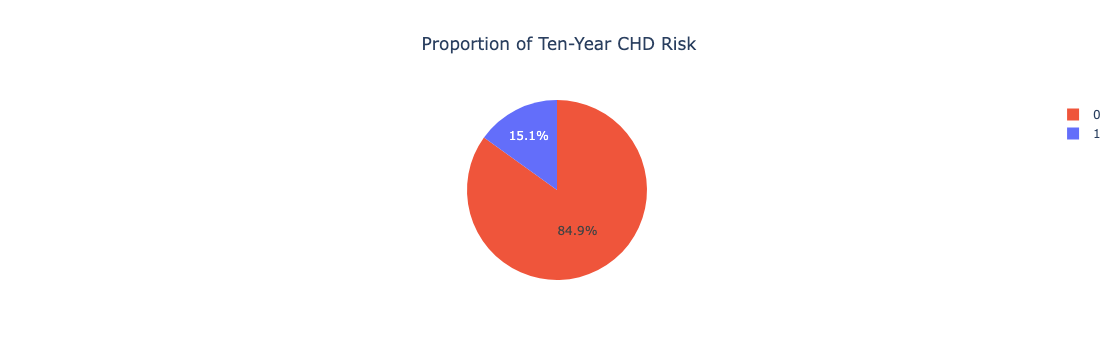

TenYearCHD
0    0.849263
1    0.150737
Name: proportion, dtype: float64


In [123]:
fig = px.pie(path, names='TenYearCHD', title='Proportion of Ten-Year CHD Risk',
                 color='TenYearCHD')

fig.update_layout(title={'x': 0.5})

fig.show()

print(path['TenYearCHD'].value_counts(normalize=True))

This shows that a large proportion of the dataset (84.9%) does not have CHD whereas 15.1% do.

##  Univariate Analysis

#### Numerical Features

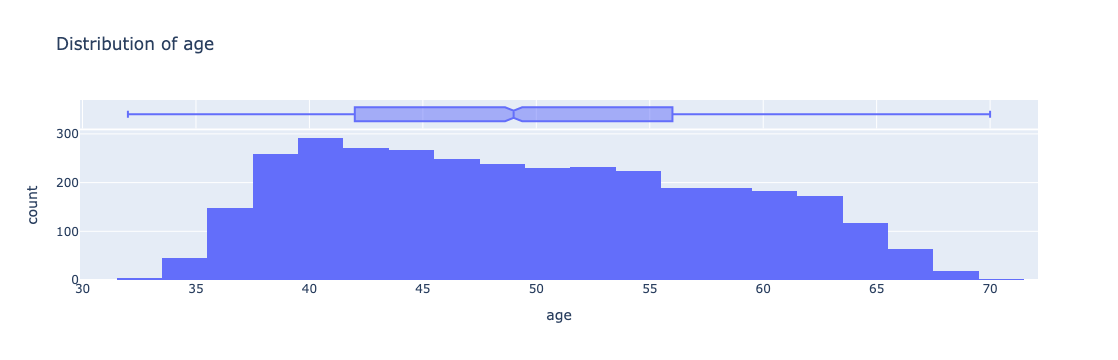

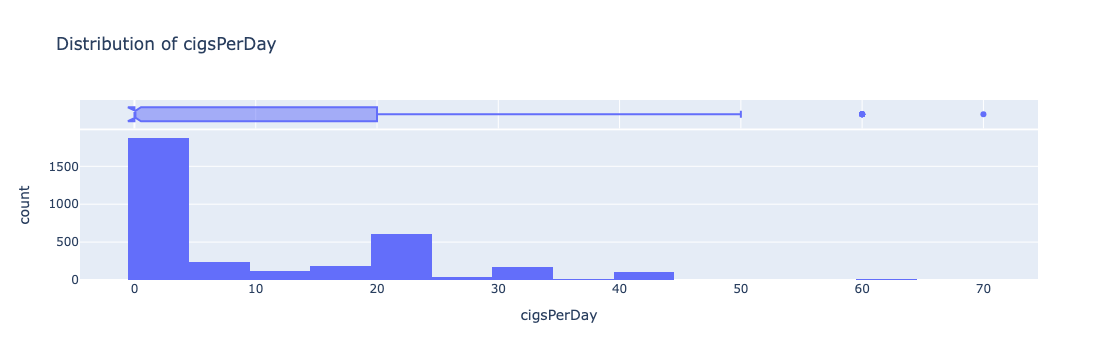

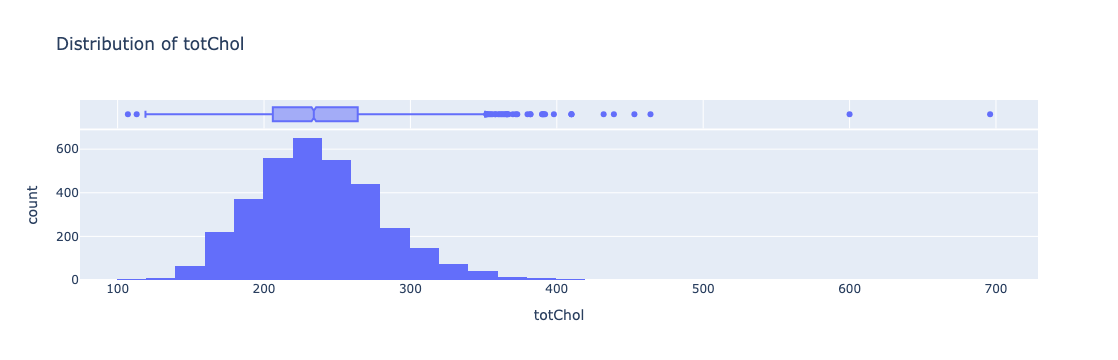

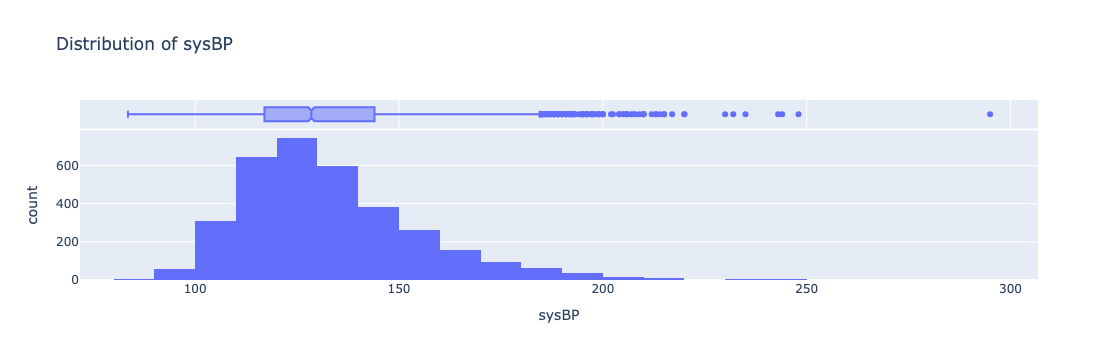

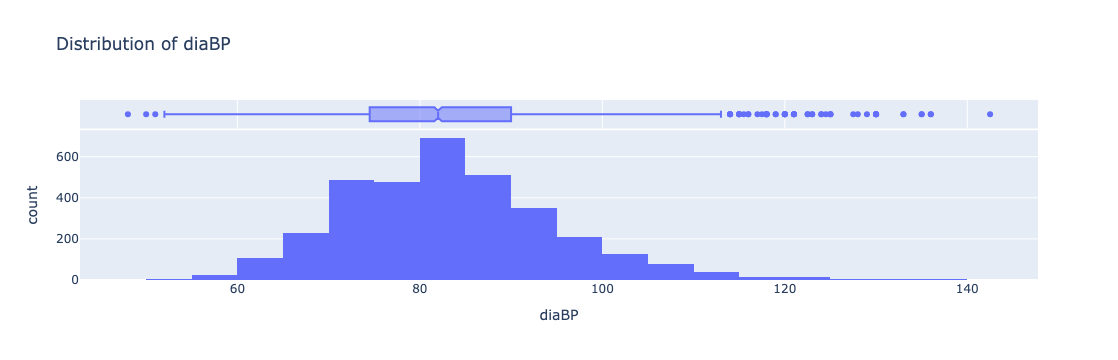

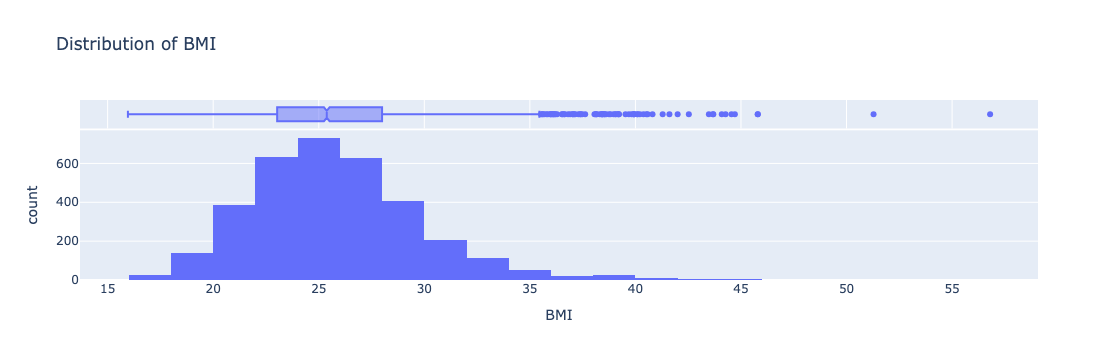

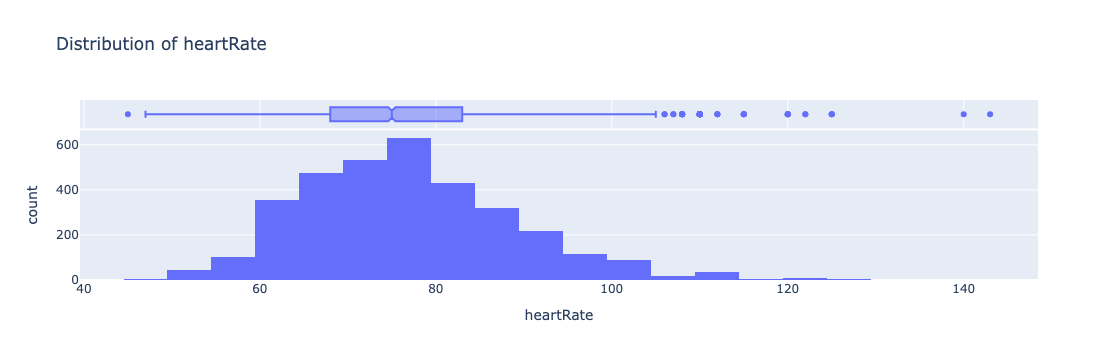

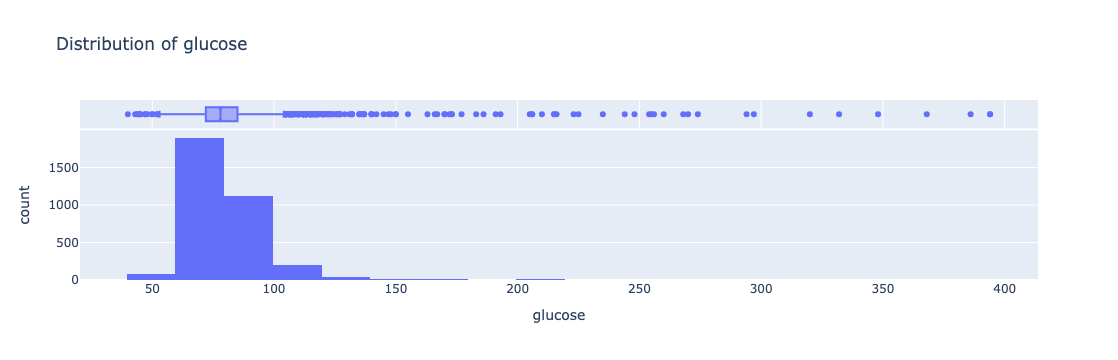

In [96]:
numerical_features = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Plot histograms and box plots
for feature in numerical_features:
    # Histogram
    fig_hist = px.histogram(path, x=feature, title=f'Distribution of {feature}', 
                             nbins=30, marginal='box', 
                             labels={feature: feature})

    fig_hist.show()

The age range in the dataset spans from 32 to 72, highlighting a population primarily in the middle-aged group. This age distribution is particularly relevant, as it represents a critical period for assessing heart disease risk.

0 - 4 cigsPerDay is the highest no with a count of 1876.

Other variables, such as totChol, sysBP, diaBP, BMI, and heartRate, follow a normal distribution (that is, a symmetrical plot of data around its mean value).



#### Categorical Features



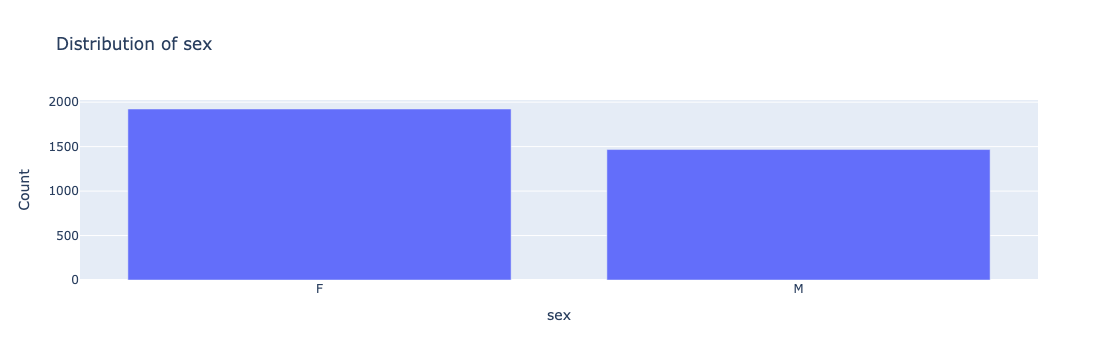

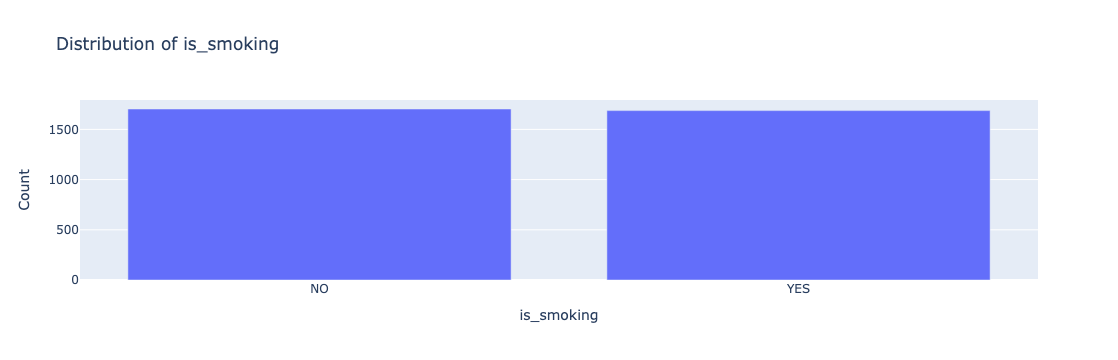

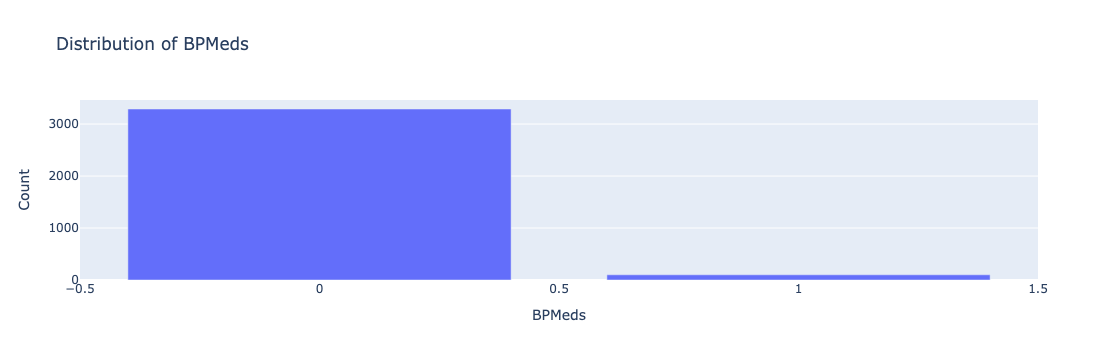

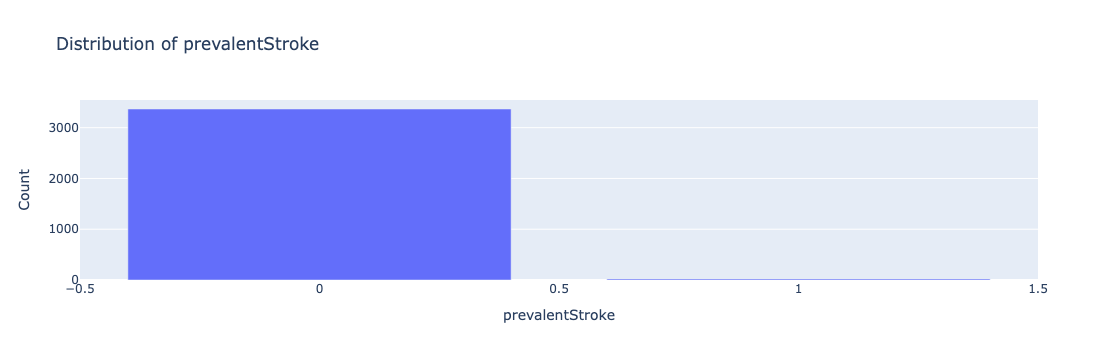

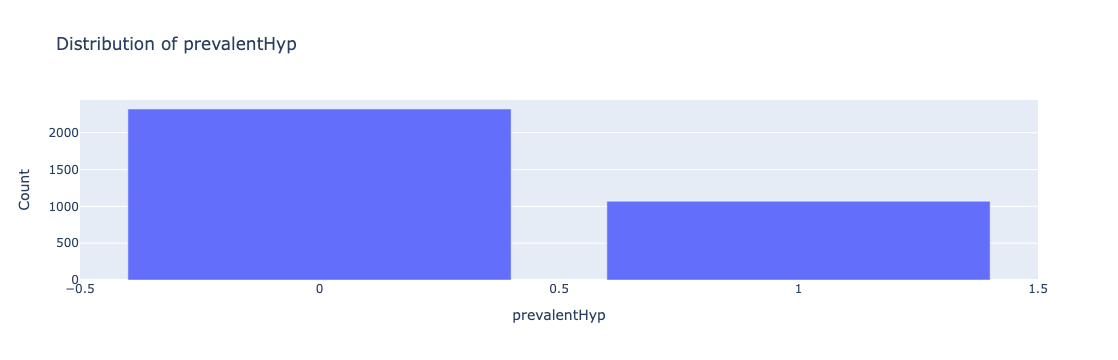

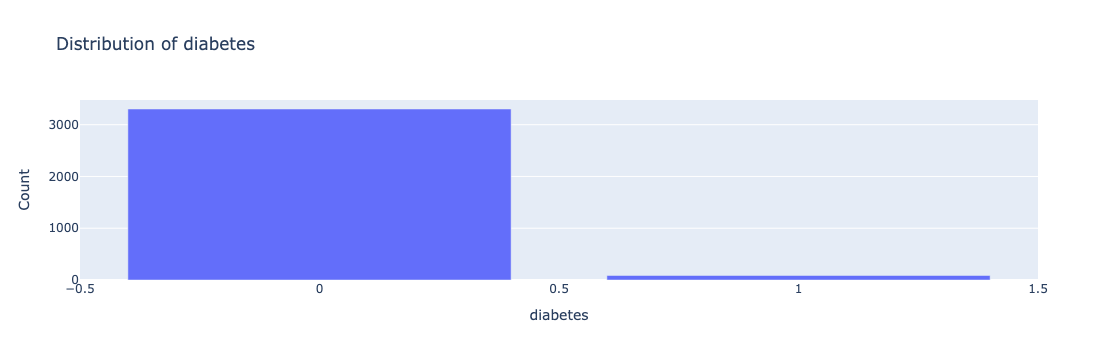

In [211]:
categorical_features = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


for feature in categorical_features:
    path[feature] = path[feature].astype('category')


for feature in categorical_features:
    counts = path[feature].value_counts().reset_index()
    counts.columns = [feature, 'count']

    fig_bar = px.bar(counts, x=feature, y='count', title=f'Distribution of {feature}',
                     labels={feature: feature, 'count': 'Count'})

    fig_bar.show()



## Bivariate Analysis
#### Numerical Features vs. Target

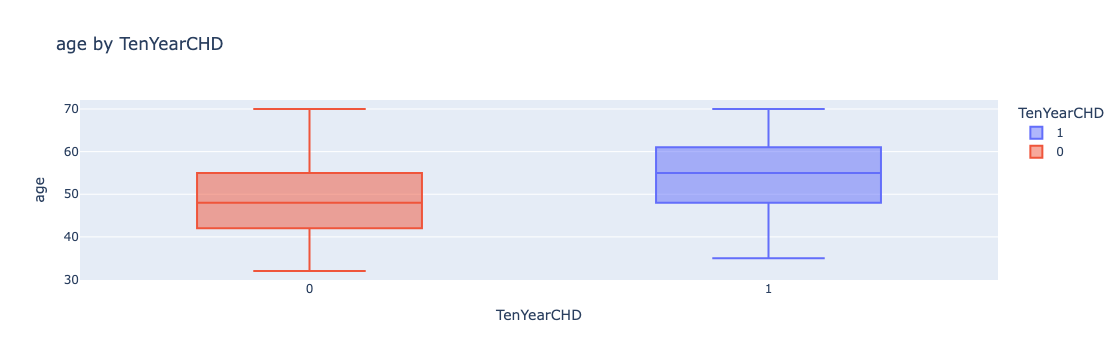

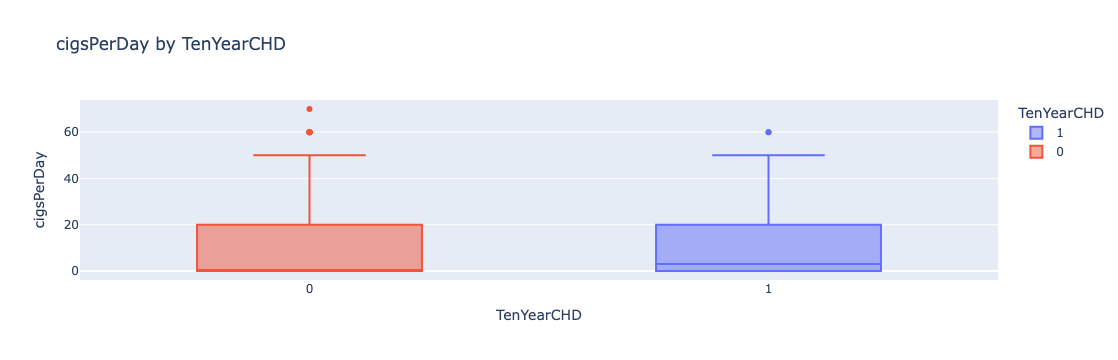

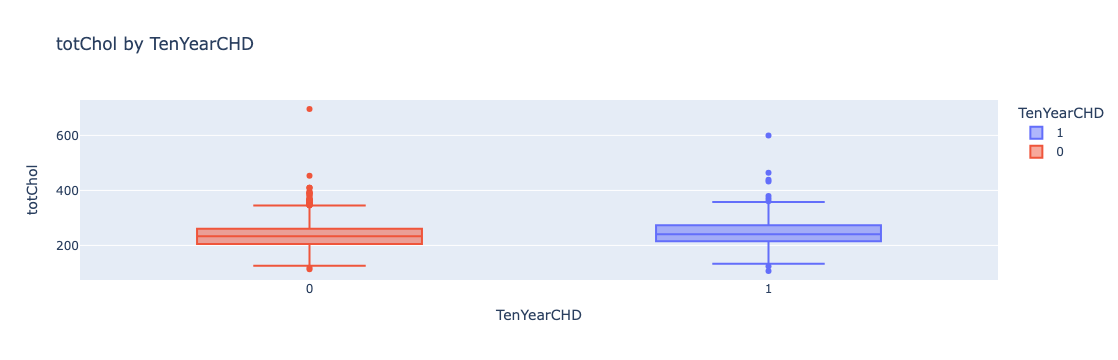

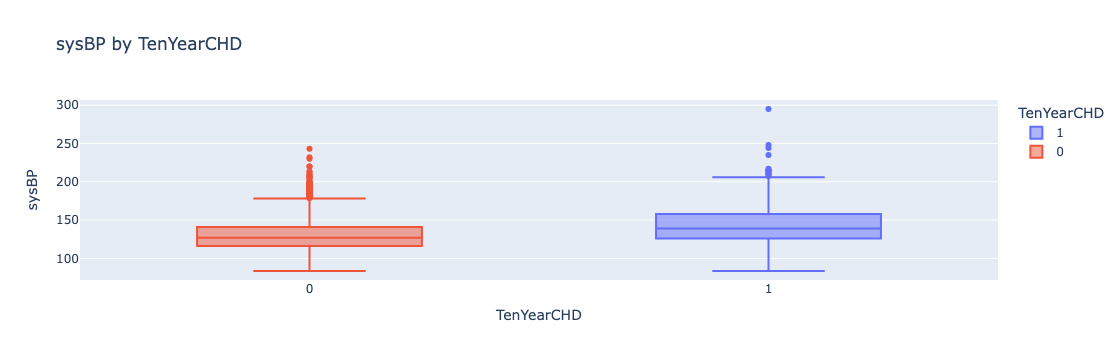

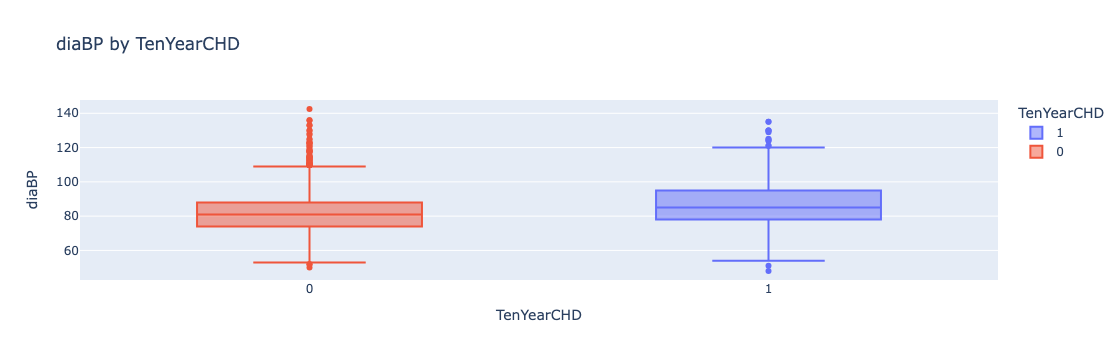

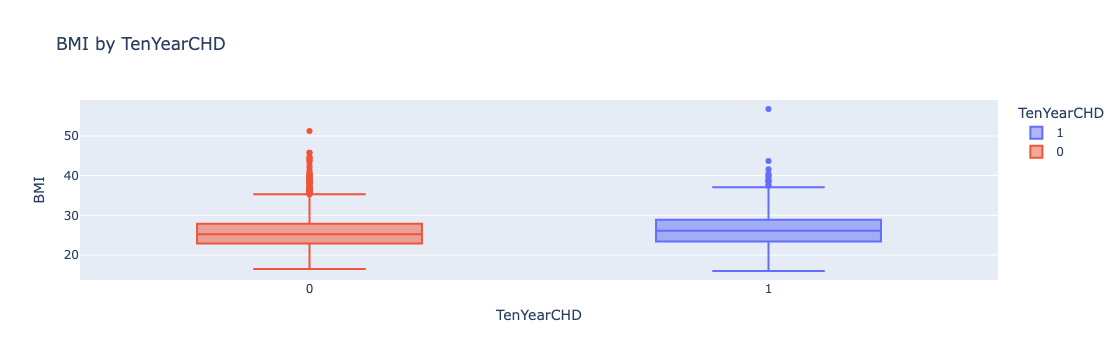

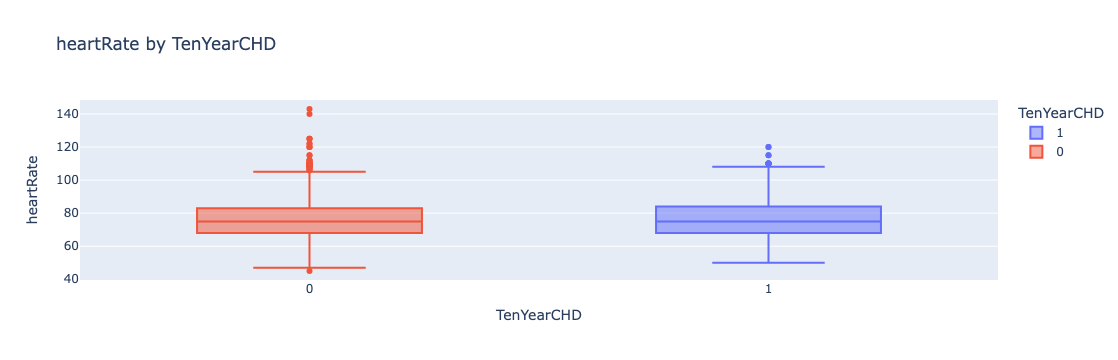

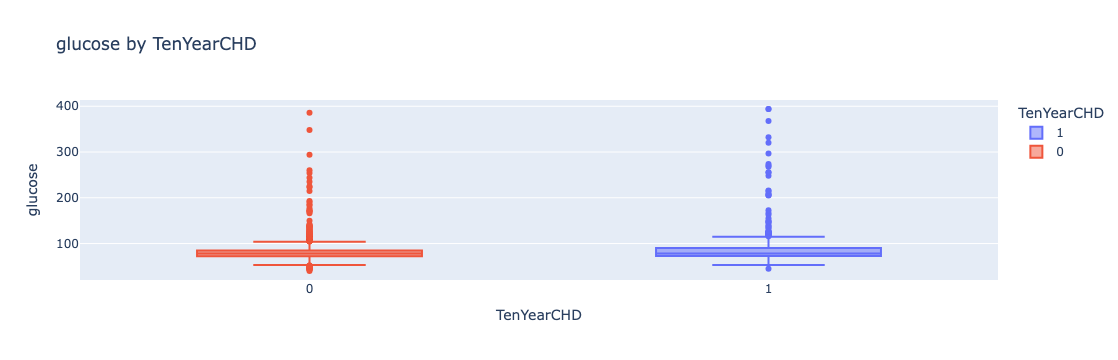

In [209]:
for feature in numerical_features:
    fig_box = px.box(path, x='TenYearCHD', y=feature, title=f'{feature} by TenYearCHD',
                     labels={'TenYearCHD': 'TenYearCHD', feature: feature}, 
                     color='TenYearCHD')

    fig_box.show()


In [212]:
for feature in numerical_features_class:
    path[feature] = pd.to_numeric(path[feature], errors='coerce')

summary_table = path.groupby('TenYearCHD')[numerical_features_class].agg(['mean', 'median', 'max', 'min'])


summary_table


age                cigsPerDay                      BPMeds  \
                 mean median max min       mean median   max  min      mean   
TenYearCHD                                                                    
0           48.728031   48.0  70  32   8.670719    0.0  70.0  0.0  0.023272   
1           54.129159   55.0  70  35  10.925636    3.0  60.0  0.0  0.064579   

                            prevalentStroke                prevalentHyp  \
           median  max  min            mean median max min         mean   
TenYearCHD                                                                
0             0.0  1.0  0.0        0.004168    0.0   1   0     0.282737   
1             0.0  1.0  0.0        0.019569    0.0   1   0     0.499022   

                           diabetes                    totChol                \
           median max min      mean median max min        mean median    max   
TenYearCHD                                                                     
0             0.0   1   0  0.018757    0.0   1   0  235.265717  233.0  696.0   
1             0.0   1   0  0.064579    0.0   1   0  247.035225  241.0  600.0   

                        sysBP                          diaBP                \
              min        mean median    max   min       mean median    max   
TenYearCHD                                                                   
0           113.0  130.603856  127.0  243.0  83.5  82.194338   81.0  142.5   
1           107.0  143.854207  139.0  295.0  83.5  86.763209   85.0  135.0   

                        BMI                       heartRate                \
             min       mean median    max    min       mean median    max   
TenYearCHD                                                                  
0           50.0  25.678836  25.25  51.28  16.48  75.875304   75.0  143.0   
1           48.0  26.437867  26.09  56.80  15.96  76.549902   75.0  120.0   

                    glucose                      
             min       mean median    max   min  
TenYearCHD                                       
0           45.0  80.417853   78.0  386.0  40.0  
1           50.0  89.056751   78.0  394.0  45.0

Interpretation of Each Feature with Respect to TenYearCHD

- Age: Older age is associated with higher CHD risk.
- Smoking (cigsPerDay): Higher smoking frequency correlates with increased CHD risk.

Health Indicators:
- BPMeds, prevalentHyp (Hypertension), and diabetes: These conditions show higher means in individuals with CHD, with hypertension being especially notable.
- Total Cholesterol (totChol) and Blood Pressure (sysBP, diaBP): Higher levels are associated with increased CHD risk.
- BMI: Slightly higher for CHD-positive cases but not substantially different.
- Glucose: Elevated in individuals with CHD.



**Overall Interpretation**
This summary shows that older age, higher smoking frequency, higher blood pressure, higher cholesterol, presence of hypertension, and elevated glucose levels tend to be associated with a higher 10-year CHD risk (TenYearCHD = 1).

#### Categorical Features vs. Target

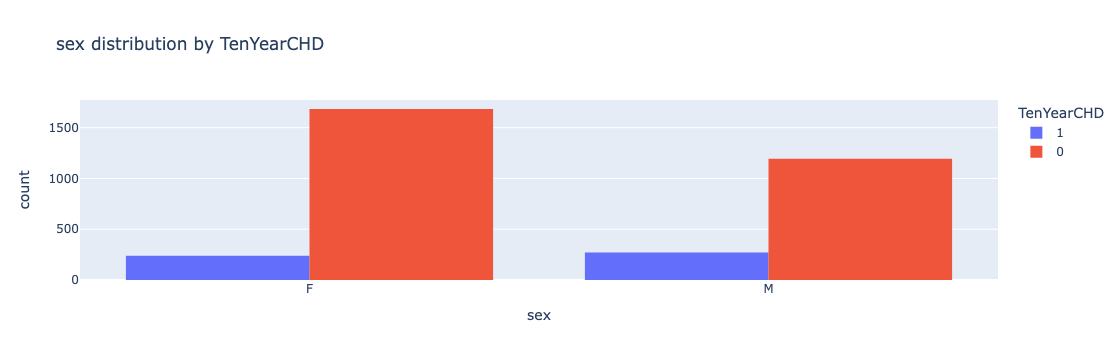

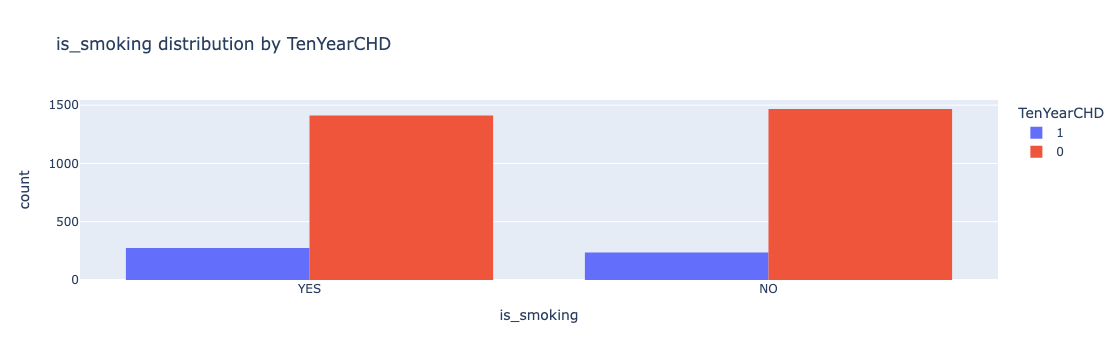

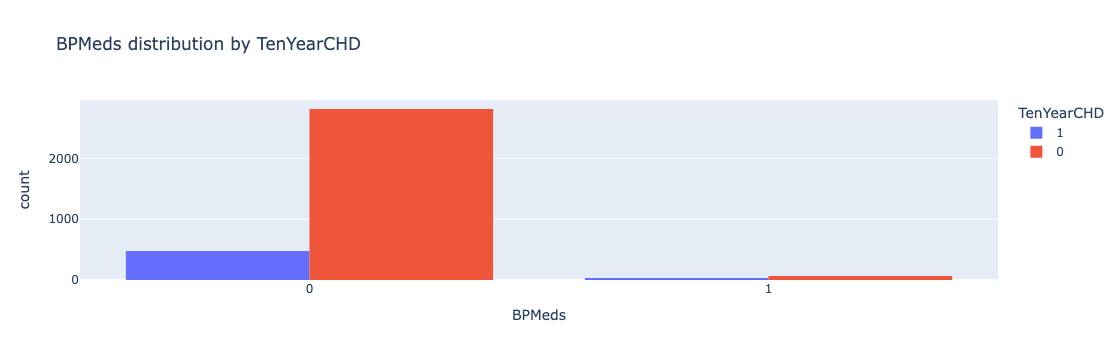

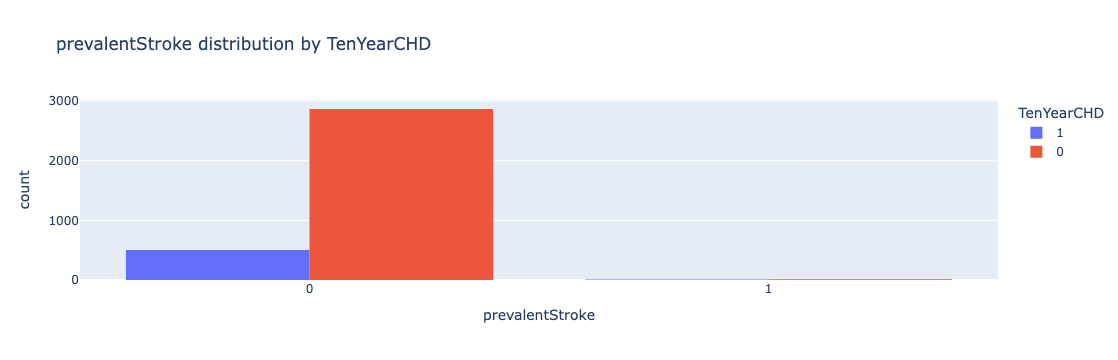

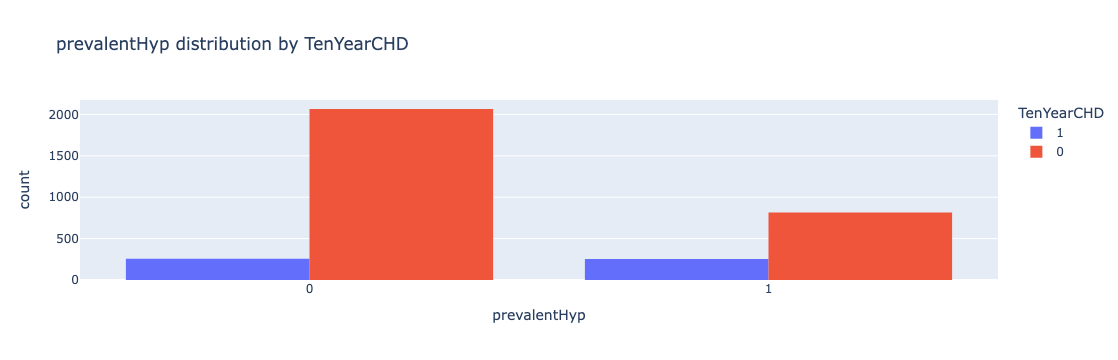

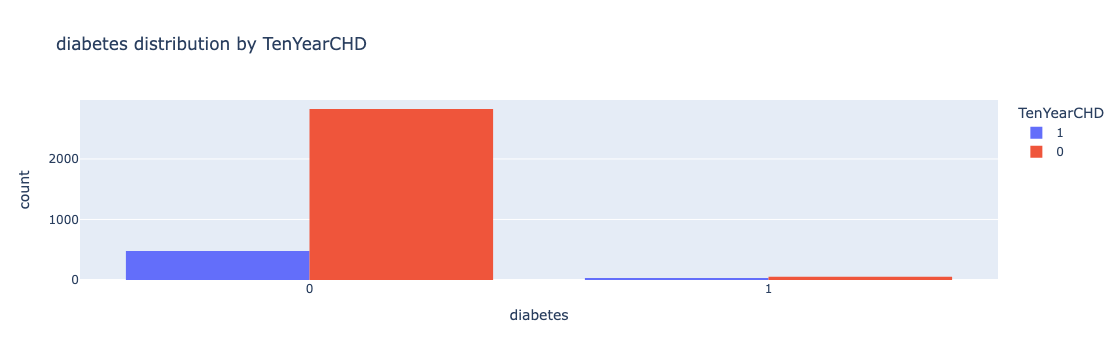

In [62]:
for feature in categorical_features:
    fig_cat = px.histogram(path, x=feature, color='TenYearCHD', 
                            title=f'{feature} distribution by TenYearCHD',
                            labels={feature: feature}, 
                            barmode='group')

    fig_cat.show()


## Correlation analysis

In [65]:
path.head()

age sex is_smoking  cigsPerDay BPMeds prevalentStroke prevalentHyp  \
id                                                                       
0    64   F        YES         3.0    0.0               0            0   
1    36   M         NO         0.0    0.0               0            1   
2    46   F        YES        10.0    0.0               0            0   
3    50   M        YES        20.0    0.0               0            1   
4    64   F        YES        30.0    0.0               0            0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
id                                                                         
0         0    221.0  148.0   85.0  25.38       90.0     80.0           1  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0

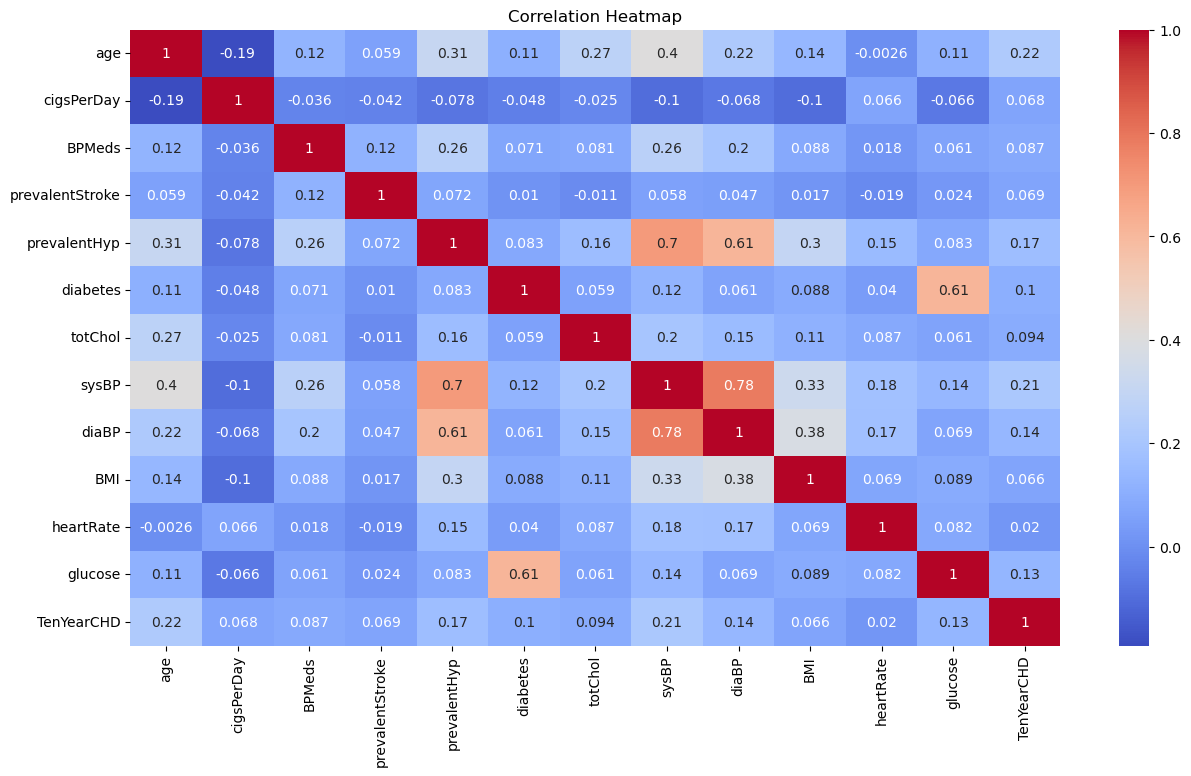

In [206]:
correlation = path.drop(columns=['sex', 'is_smoking']).corr()


plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [207]:
correlation_results = {}

continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for var in continuous_vars:
    correlation, p_value = pointbiserialr(path['TenYearCHD'], path[var])
    correlation_results[var] = {'Correlation': correlation, 'p-value': p_value}

binary_vars = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for var in binary_vars:
    correlation, p_value = pearsonr(path['TenYearCHD'], path[var])
    correlation_results[var] = {'Correlation': correlation, 'p-value': p_value}

correlation_df = pd.DataFrame(correlation_results).T
print(correlation_df)

                 Correlation       p-value
age                 0.224927  3.869151e-40
cigsPerDay          0.068020  7.385407e-05
totChol             0.093605  4.761617e-08
sysBP               0.212703  5.563530e-36
diaBP               0.135979  1.846880e-15
BMI                 0.066134  1.164940e-04
heartRate           0.020167  2.404402e-01
glucose             0.133472  6.029291e-15
BPMeds              0.087349  3.511994e-07
prevalentStroke     0.068627  6.362672e-05
prevalentHyp        0.166544  1.646912e-22
diabetes            0.103681  1.441565e-09


__Overall Insights:__
Variables like age, systolic blood pressure (sysBP), and prevalent hypertension have the strongest correlations with CHD risk, indicating they are potentially more influential factors.
Other factors, though statistically significant (e.g., cholesterol, glucose), show weaker correlations with CHD risk, suggesting a smaller impact.
Heart rate shows no significant correlation with CHD risk and likely has little to no impact.


## Classfication- Machine Learning

#### Selecting the Most Appropriate Classification Metric
Given that CHD prediction is typically focused on identifying high-risk individuals (i.e., maximizing true positives), recall is the most appropriate metric. High recall means the model successfully identifies more actual CHD cases, which is critical in a health-related prediction where the cost of missing a high-risk individual can be severe.

However, precision is also valuable in this context, as too many false positives may lead to unnecessary interventions. Thus, F1 score (which balances precision and recall) is also a useful metric to assess the model’s balance between correctly identifying CHD cases and minimizing false positives.

In [141]:
path_copy = path.copy()

#### Preprocessing and Feature Engineering

In [199]:
path_copy['sex_encoded'] = path_copy['sex'].map({'F': 0, 'M': 1})
path_copy['is_smoking_encoded'] = path_copy['is_smoking'].map({'NO': 0, 'YES': 1})


scaler = StandardScaler()
numerical_features = \
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
path_copy[numerical_features] = scaler.fit_transform(path[numerical_features])


I carried out binary encoding for the binary categorical variables.

I also scaled the numerical features for normalization

#### Spliting the Data

In [165]:
X = path_copy.drop(columns=['TenYearCHD', 'sex', 'is_smoking'])
y = path_copy['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Logistic Regression Model

In [144]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Hyperparameter Tuning with Grid Search

In [166]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_


I used the GridSearchCV to find the best hyperparameters for logistic regression.

Hyperparameter tuning with Grid Search is a technique used to find the best combination of hyperparameters for a model. In this case, the param_grid defines a range of values for two hyperparameters of the logistic regression model:

C: This parameter controls the regularization strength of the model. A smaller value for C implies stronger regularization, which can help prevent overfitting but may reduce the model’s ability to fit the data well. Conversely, a larger C value allows the model more flexibility to fit the data but may increase the risk of overfitting.

solver: Different solvers optimize the logistic regression model in different ways, potentially affecting performance and convergence. For example:

'lbfgs' is generally fast and works well for smaller datasets.

'liblinear' is good for binary classification and may be more effective for sparse datasets.


#### Model Evaluation on Test Set

In [185]:
y_pred = best_log_reg.predict(X_test)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

report = classification_report(y_test, y_pred, target_names=['No CHD (0)', 'CHD (1)'])

print(report)


Accuracy: 0.8673
Precision: 0.7692
Recall: 0.1031
F1 Score: 0.1818
ROC AUC Score: 0.7282
              precision    recall  f1-score   support

  No CHD (0)       0.87      0.99      0.93       581
     CHD (1)       0.77      0.10      0.18        97

    accuracy                           0.87       678
   macro avg       0.82      0.55      0.55       678
weighted avg       0.85      0.87      0.82       678



### Adjusting the optimal threshold

Optimal Threshold: 0.13
Accuracy: 0.6549
Precision: 0.2527
Recall: 0.7216
F1 Score: 0.3743
ROC AUC Score: 0.7282
              precision    recall  f1-score   support

  No CHD (0)       0.93      0.64      0.76       581
     CHD (1)       0.25      0.72      0.37        97

    accuracy                           0.65       678
   macro avg       0.59      0.68      0.57       678
weighted avg       0.84      0.65      0.71       678



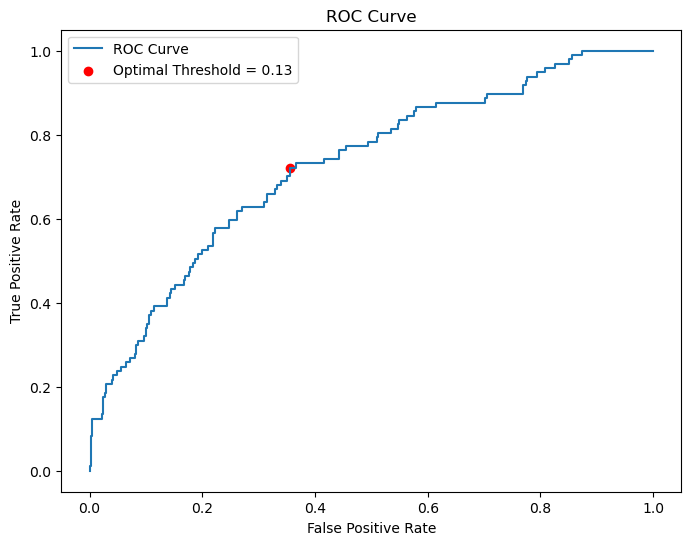

In [198]:
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

J = tpr - fpr
optimal_idx = J.argmax()
optimal_threshold = thresholds[optimal_idx]

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

report = classification_report(y_test, y_pred_optimal, target_names=['No CHD (0)', 'CHD (1)'])

print(report)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC Curve find a threshold that provides a desired balance between true positive and false positive rates

The optimal threshold was identified as 0.13 and fine-tuned accordingly. 

#### Handling the data imbalance with SMOTE

In [194]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Training the model

In [204]:
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred_proba = model.predict_proba(X_test)[:, 1]

def find_optimal_threshold(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold


optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
print(f'Optimal Threshold: {optimal_threshold}')


y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_pred_proba)


print(f'Overall Accuracy: {accuracy:.4f}')
print(f'Overall Precision: {precision:.4f}')
print(f'Overall Recall: {recall:.4f}')
print(f'Overall F1 Score: {f1:.4f}')
print(f'Overall ROC AUC Score: {roc_auc:.4f}')


print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal, target_names=['No CHD (0)', 'CHD (1)']))

Optimal Threshold: 0.5525799709306488
Overall Accuracy: 0.7566
Overall Precision: 0.3132
Overall Recall: 0.5876
Overall F1 Score: 0.4086
Overall ROC AUC Score: 0.7129

Classification Report:
              precision    recall  f1-score   support

  No CHD (0)       0.92      0.78      0.85       581
     CHD (1)       0.31      0.59      0.41        97

    accuracy                           0.76       678
   macro avg       0.62      0.69      0.63       678
weighted avg       0.83      0.76      0.78       678



SMOTE oversamples the minority class (CHD = 1) in the training data to balance the class distribution.

SMOTE with an optimized threshold is better in imbalanced medical prediction contexts where catching as many true positives (high recall) is a priority, in this case, cardiovascular disease prediction. 


#### Interpretation of the mode


- **Overall Accuracy:** The model achieved an accuracy of 76%, indicating that it correctly predicts the presence or absence of CHD in 76% of cases. This suggests a good level of predictive performance.

- **Precision:** The precision for predicting "No CHD (0)" is high at 0.92, meaning that when the model predicts no CHD, it is correct 92% of the time. However, the precision for "CHD (1)" is lower at 0.31, indicating a higher rate of false positives in identifying patients at risk for CHD.

- **Recall:** The recall score of 0.59 for "CHD (1)" indicates that the model is able to correctly identify 59% of the actual cases of CHD. This still implies that there are 41% of actual CHD cases that are not being identified by the model.

- **F1 Score:** The F1 score, which balances precision and recall, is 0.41 for "CHD (1)". This reflects the model’s struggle to accurately predict positive cases of CHD despite the overall good performance with negative cases.

- **ROC AUC Score (0.7129):** The ROC AUC score (Area Under the Receiver Operating Characteristic Curve) measures the model’s ability to distinguish between the two classes (high vs. low risk) across different thresholds. A score of 0.7129 indicates a fair ability to separate high-risk and low-risk cases, but it’s not particularly strong.



### Conclusions
The logistic regression model performs well, particularly in identifying individuals without CHD (0). However, the lower precision and recall for identifying CHD cases indicate that there is room for improvement. This may be critical for applications where correctly identifying at-risk patients is essential for timely intervention.

### Recommendations

- **Model Exploration:** To experiment with more complex models such as Random Forest, Gradient Boosting, or Support Vector Machines (SVM) which might capture non-linear relationships better than logistic regression.


- **Feature Engineering:** To explore additional feature engineering techniques to create new variables or transform existing features that may better represent the data and contribute to model accuracy.